In [1]:
# import libs
import requests
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


# define paths
API_key_path = "API keys/salling_bearer.txt"


In [2]:
# get credentials
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

API_key = get_file_contents(API_key_path)

In [3]:
# define zip codes
zipcodedf = pd.read_csv("data/zipcodes.csv")

In [4]:
zipcodedf.head()

,Postal Code,City
0,555,Scanning
1,800,Høje Taastrup
2,877,Valby
3,899,Kommuneservice
4,900,København C


In [5]:
uniqueZipCodes = zipcodedf['Postal Code'].unique()
#zipcodedf['Postal Code'].unique()

for i, zipcode in enumerate(uniqueZipCodes):
    endpoint_url = f"https://api.sallinggroup.com/v1/food-waste?zip={zipcode}"

    # Set your API key or access token as a header
    headers = {"Authorization": f"Bearer {API_key}"}
    # Make the HTTP GET request to the API endpoint
    response = requests.get(endpoint_url, headers=headers)
    
    if response.status_code == 200:
        # Parse the response content as JSON
        data = response.json()
        print(response.status_code)
        # Extract the relevant data from the JSON object
        # and do something with it (e.g. print it out)
        print('Data Retrieval has been compeleted')
    else:
        print("Error: Failed to retrieve data from API")
    
    data = response.json()
    # create data frame structre
    if i == 0:
        df = pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])
    # iteratively join data frames for different zip codes
    else:
        try:
            df = pd.concat([df, pd.json_normalize(data, record_path=['clearances'], meta=['store', ['store', 'brand'], ['store', 'name'], ['store', 'id']])])
        except:
            pass
    
    print(zipcode)
    print(f'size of dataframe:{np.shape(df)}')
    time.sleep(1)

# join adress specific data to df
df = df.reset_index(drop=True)
df = df.join(pd.json_normalize(df['store']))

# clean up coordinates
df[['lat', 'lon']] = ((df['coordinates'].astype(str)).str.strip('[]').str.split(',', expand=True).astype(float))

200
Data Retrieval has been compeleted
555
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
800
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
877
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
899
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
900
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
910
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
929
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
999
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1000
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1001
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1002
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1003
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1004
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
1005
size of dataframe:(0, 0)
200
Data Retrieval has been compeleted
100

In [6]:
# print first 5 rows
df.head()

,offer.currency,offer.discount,offer.ean,offer.endTime,offer.lastUpdate,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.startTime,offer.stock,...,name,id,type,address.city,address.country,address.extra,address.street,address.zip,lat,lon
0,DKK,9.95,5712580189031,2023-03-30T21:59:59.000Z,2023-03-26T07:53:10.000Z,15.0,24.95,39.88,2023-03-26T07:52:52.000Z,1.0,...,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105,12.58234,55.680168
1,DKK,11.95,5712580188508,2023-03-27T21:59:59.000Z,2023-03-25T09:25:43.000Z,16.0,27.95,42.75,2023-03-25T09:25:21.000Z,2.0,...,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105,12.58234,55.680168
2,DKK,19.95,5712580188973,2023-03-26T21:59:59.000Z,2023-03-26T06:01:06.000Z,8.0,27.95,71.38,2023-03-26T06:00:43.000Z,2.0,...,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105,12.58234,55.680168
3,DKK,12.95,5712580188904,2023-03-26T21:59:59.000Z,2023-03-26T05:51:14.000Z,10.0,22.95,56.43,2023-03-26T05:50:55.000Z,1.0,...,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105,12.58234,55.680168
4,DKK,8.95,5712580188560,2023-03-27T21:59:59.000Z,2023-03-25T09:41:15.000Z,14.0,22.95,39.00,2023-03-25T09:40:55.000Z,2.0,...,føtex Food K. Bernikows G.,2b2a046f-1454-4db5-89db-251f63775a9e,Point,København K,DK,None,Kristen Bernikows Gade 2,1105,12.58234,55.680168


In [7]:
df['address.zip'].unique()

array(['1105', '1119', '1171', '1260', '1264', '1304', '1307', '1353',
       '1358', '1401', '1436', '1456', '1560', '1574', '1604', '1614',
       '1620', '1666', '1717', '1757', '1799', '1800', '1850', '1879',
       '1958', '2000', '2100', '2200', '2300', '2400', '2450', '2500',
       '2600', '2605', '2610', '2620', '2630', '2635', '2640', '2650',
       '2660', '2665', '2670', '2680', '2690', '2700', '2720', '2730',
       '2740', '2750', '2760', '2765', '2770', '2791', '2800', '2820',
       '2830', '2840', '2850', '2860', '2870', '2880', '2900', '2950',
       '2960', '2970', '2980', '2990', '3000', '3050', '3060', '3070',
       '3100', '3120', '3140', '3200', '3210', '3230', '3250', '3300',
       '3310', '3320', '3330', '3390', '3400', '3450', '3460', '3480',
       '3500', '3520', '3540', '3550', '3600', '3630', '3650', '3660',
       '3670', '3700', '3720', '3730', '3770', '4050'], dtype=object)

In [8]:
df.describe()

,offer.discount,offer.newPrice,offer.originalPrice,offer.percentDiscount,offer.stock,lat,lon
count,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000
mean,11.427844,18.183786,29.611630,38.767061,39.021428,12.486252,55.733664
std,9.187903,13.627603,20.448731,14.200564,279.375746,0.363364,0.151574
min,0.250000,1.000000,1.250000,3.000000,1.000000,11.851253,55.056853
25%,5.500000,10.000000,17.950000,26.120000,1.000000,12.358027,55.662710
50%,9.500000,14.000000,24.500000,37.420000,3.000000,12.486628,55.703002
75%,13.950000,23.000000,35.000000,47.370000,6.000000,12.556080,55.780555
max,224.000000,249.000000,299.000000,89.960000,9996.000000,15.128817,56.125979


In [9]:
# there are 2700 ish rows with nan as product category
# we will filter these out
df = df.dropna(subset='product.categories.en')

# clean product categories
df['product.categories.en'] = df['product.categories.en'].str.replace('>sification 1 root>umer Faced Hierarchy','')
new = df["product.categories.en"].str.split(">", n = 6, expand = True)

for i in np.arange(0,6,1):
    try:
        df[f'product.category.en.level{i}'] = new[i]
    except:
         df[f'product.category.en.level{i}'] = 'nan'

In [10]:
# add year, month, weekday and hour for each timestamp
df['offer.endTime']  = pd.to_datetime(df['offer.endTime']).dt.tz_convert('Europe/Berlin')
df['offer.startTime'] = pd.to_datetime(df['offer.startTime']).dt.tz_convert('Europe/Berlin')
df['offer.lastUpdate'] = pd.to_datetime(df['offer.lastUpdate']).dt.tz_convert('Europe/Berlin')

df['offer.endTime.hour'] = df['offer.endTime'].dt.hour
df['offer.endTime.weekday'] = df['offer.endTime'].dt.weekday
df['offer.endTime.month'] = df['offer.endTime'].dt.month
df['offer.endTime.year'] = df['offer.endTime'].dt.year

df['offer.startTime.hour'] = df['offer.startTime'].dt.hour
df['offer.startTime.weekday'] = df['offer.startTime'].dt.weekday
df['offer.startTime.month'] = df['offer.startTime'].dt.month
df['offer.startTime.year'] = df['offer.startTime'].dt.year

df['offer.lastUpdate.hour'] = df['offer.lastUpdate'].dt.hour
df['offer.lastUpdate.weekday'] = df['offer.lastUpdate'].dt.weekday
df['offer.lastUpdate.month'] = df['offer.lastUpdate'].dt.month
df['offer.lastUpdate.year'] = df['offer.lastUpdate'].dt.year


In [11]:
# save data
#df.to_csv('data/data.csv')

# load data
#df = pd.read_csv('data/data.csv')

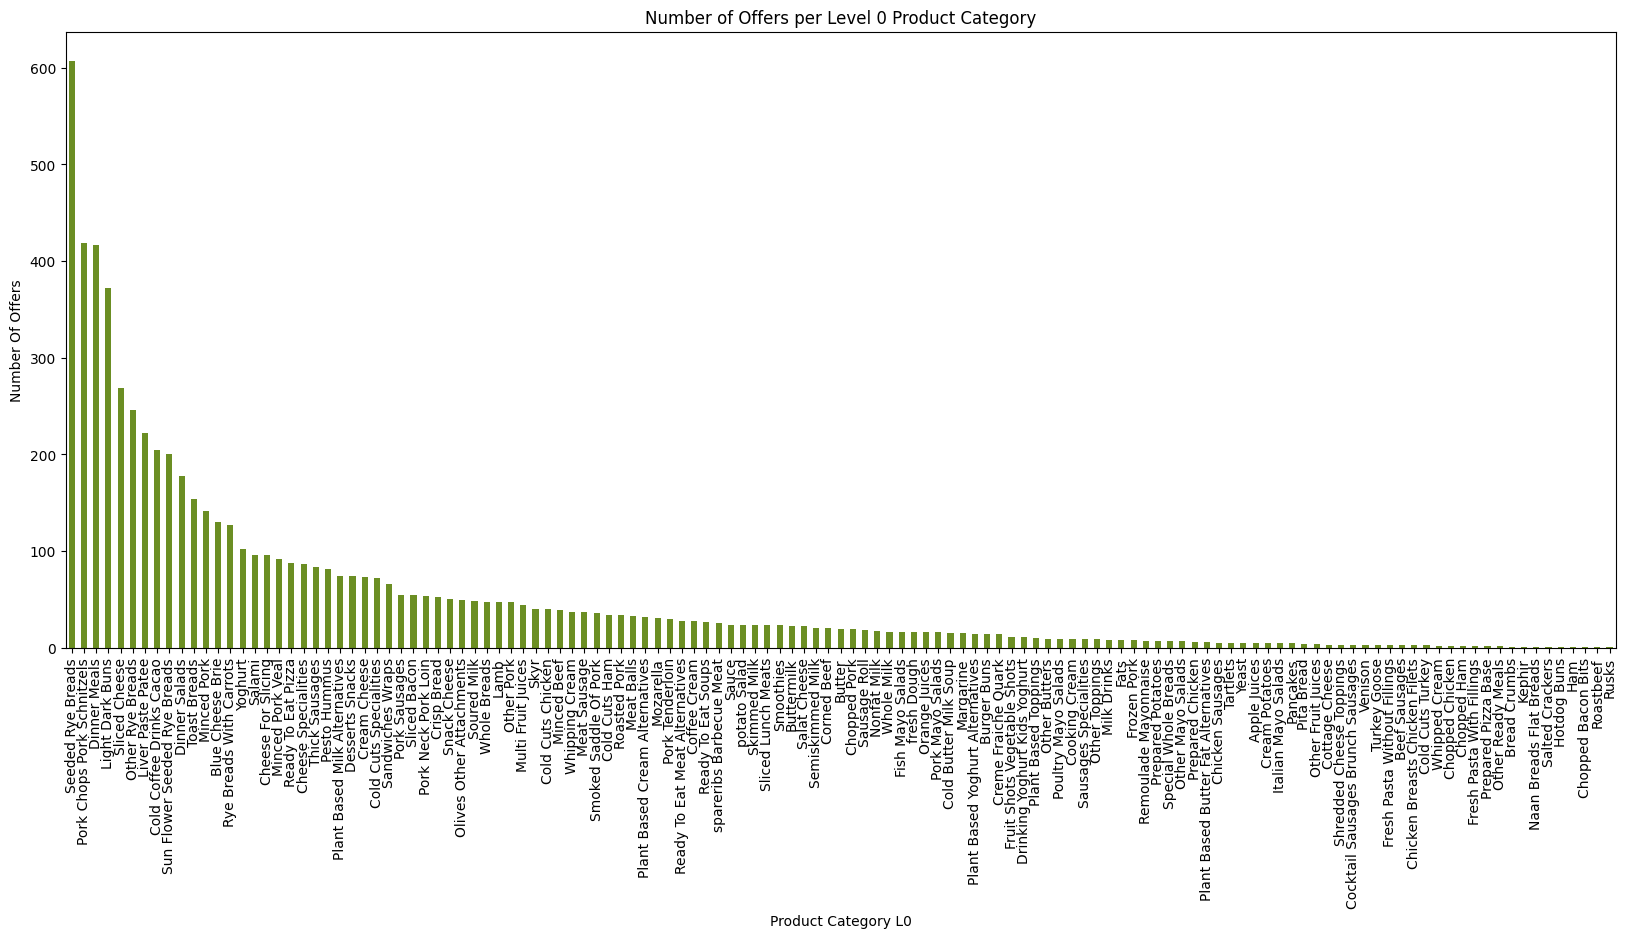

In [12]:
# visualise data
# start offer
df_offersPerCategoryL0 = df[['offer.startTime','product.category.en.level0']].groupby('product.category.en.level0').count()
df_offersPerCategoryL0 = df_offersPerCategoryL0.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCategoryL0 = df_offersPerCategoryL0.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCategoryL0.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Product Category L0', title='Number of Offers per Level 0 Product Category',color='olivedrab')
plt.show()

#offer_category_weekday = pd.pivot_table(df, values='offer.ean', index='offer.startTime.weekday',columns='product.category.en.level0',aggfunc='count')
#offer_category_weekday

In [13]:
# implement NLP to generate better classifications/categories for the products
from sklearn.feature_extraction import _stop_words
import string
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from adjustText import adjust_text
from sklearn.decomposition import PCA


lemmatizer = WordNetLemmatizer()

# pre process words
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in _stop_words.ENGLISH_STOP_WORDS])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

# define unique level 0 categories
L0categories = df['product.category.en.level0'].unique()
# remove 'nan'
#L0categories = [x for x in L0categories if str(x) != 'nan']

cleanL0categories = np.empty(np.shape(L0categories)[0],dtype=str)
for i, text in enumerate(L0categories):
    cleanL0categories[i] = (text_processing(text))

# We need to embed sentences into vectors 
# define unique level 0 categories
# define model
model = SentenceTransformer('all-MiniLM-L6-v2') #https://www.sbert.net/
# vectorize each categary
vectorembeddings = model.encode(L0categories)

c:\Users\phili\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


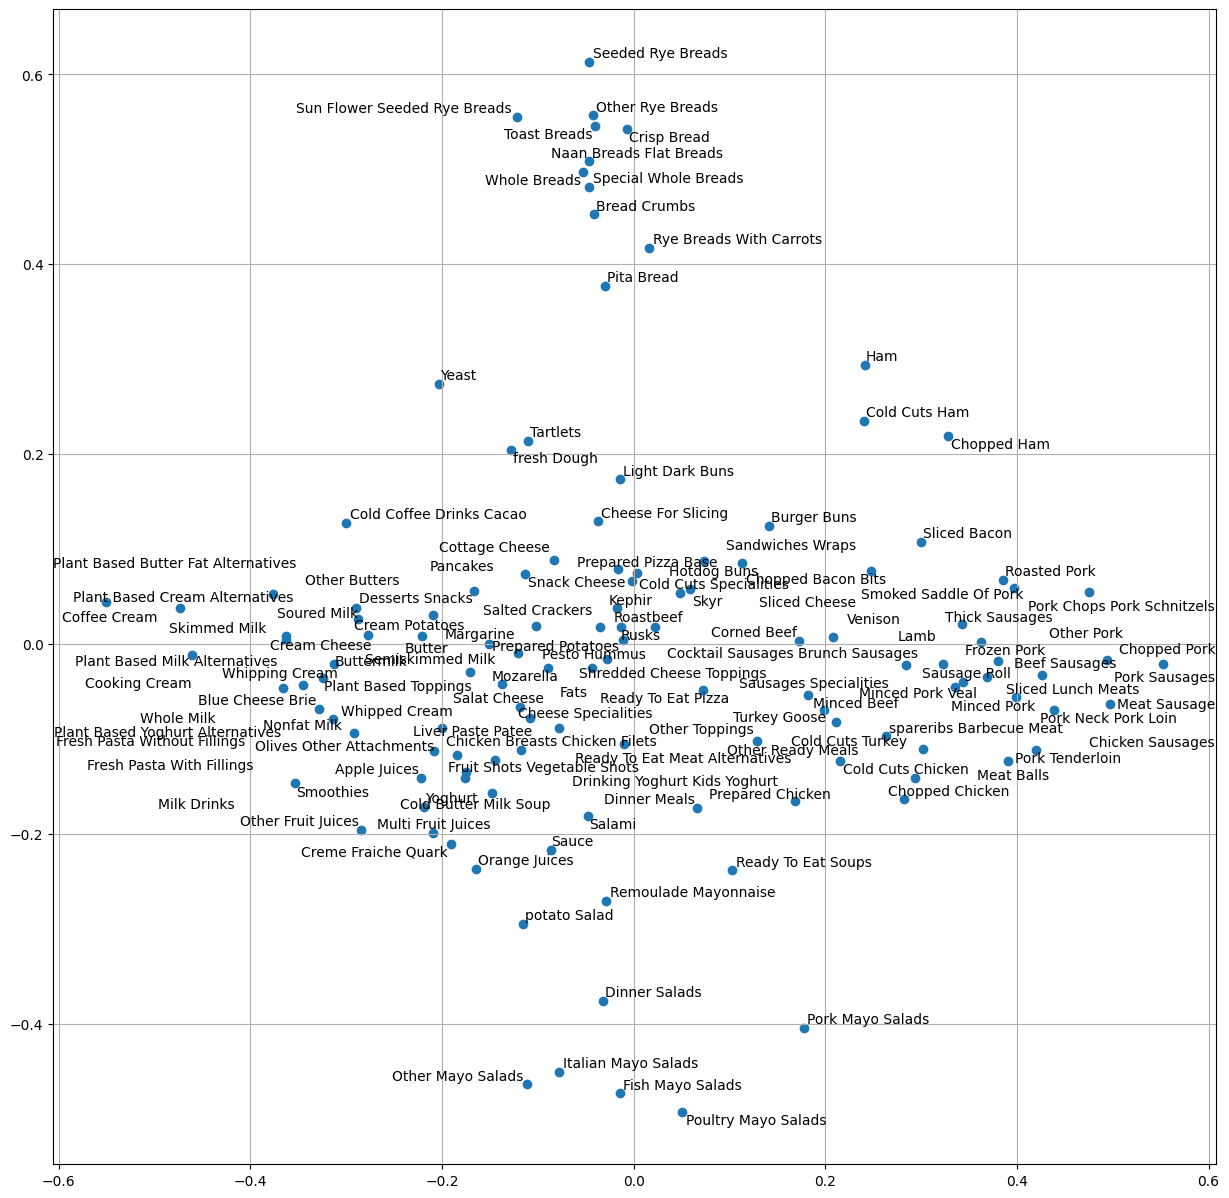

In [14]:
# PCA decomp. Exploratory analysis
# 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(np.array(vectorembeddings))

plt.figure(figsize=(15,15))
plt.scatter(vectors_2d.T[0], vectors_2d.T[1])

texts = [plt.text(vectors_2d.T[0,i], vectors_2d.T[1,i], L0categories[i]) for i in range(len(L0categories))]
adjust_text(texts, fontsize=5)          
plt.grid()
plt.show()

In [15]:
# kmeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(np.array(vectorembeddings))
labels = kmeans.labels_

clusteringresults = pd.DataFrame({'L0Categories' : L0categories,'Label': labels})

for i in clusteringresults['Label'].unique():
    print(f"Label {i}")
    print(clusteringresults[clusteringresults['Label']==i]['L0Categories'].unique())
    
# use clustering labels to give each product a lable i.e use the above as a mapping
clustermapping = {}

for i, text in enumerate(clusteringresults['L0Categories'].unique()):
    clustermapping[text] = str(clusteringresults['Label'][i])

df['L0Categories.new'] = df['product.category.en.level0'].map(clustermapping)

Label 3
['Desserts Snacks' 'Creme Fraiche Quark' 'Orange Juices' 'Mozarella'
 'Whipping Cream' 'Liver Paste Patee' 'Nonfat Milk'
 'Drinking Yoghurt Kids Yoghurt' 'Cream Potatoes' 'Whole Milk'
 'Skimmed Milk' 'Semiskimmed Milk' 'Cold Coffee Drinks Cacao' 'Yoghurt'
 'Milk Drinks' 'Sauce' 'Plant Based Milk Alternatives'
 'Plant Based Cream Alternatives' 'Other Butters' 'Buttermilk' 'Smoothies'
 'Soured Milk' 'Coffee Cream' 'Cold Butter Milk Soup' 'Butter'
 'Apple Juices' 'Cream Cheese' 'Fats' 'Yeast' 'Margarine' 'Pancakes'
 'Fruit Shots Vegetable Shots' 'Tartlets' 'Cooking Cream' 'Cottage Cheese'
 'Whipped Cream' 'Multi Fruit Juices' 'Kephir'
 'Plant Based Butter Fat Alternatives' 'Salted Crackers' 'Roastbeef'
 'Plant Based Yoghurt Alternatives' 'Other Fruit Juices']
Label 0
['Light Dark Buns' 'Seeded Rye Breads' 'Burger Buns'
 'Sun Flower Seeded Rye Breads' 'Sandwiches Wraps' 'Toast Breads'
 'Rye Breads With Carrots' 'Other Rye Breads' 'fresh Dough'
 'Special Whole Breads' 'Crisp Bread' 

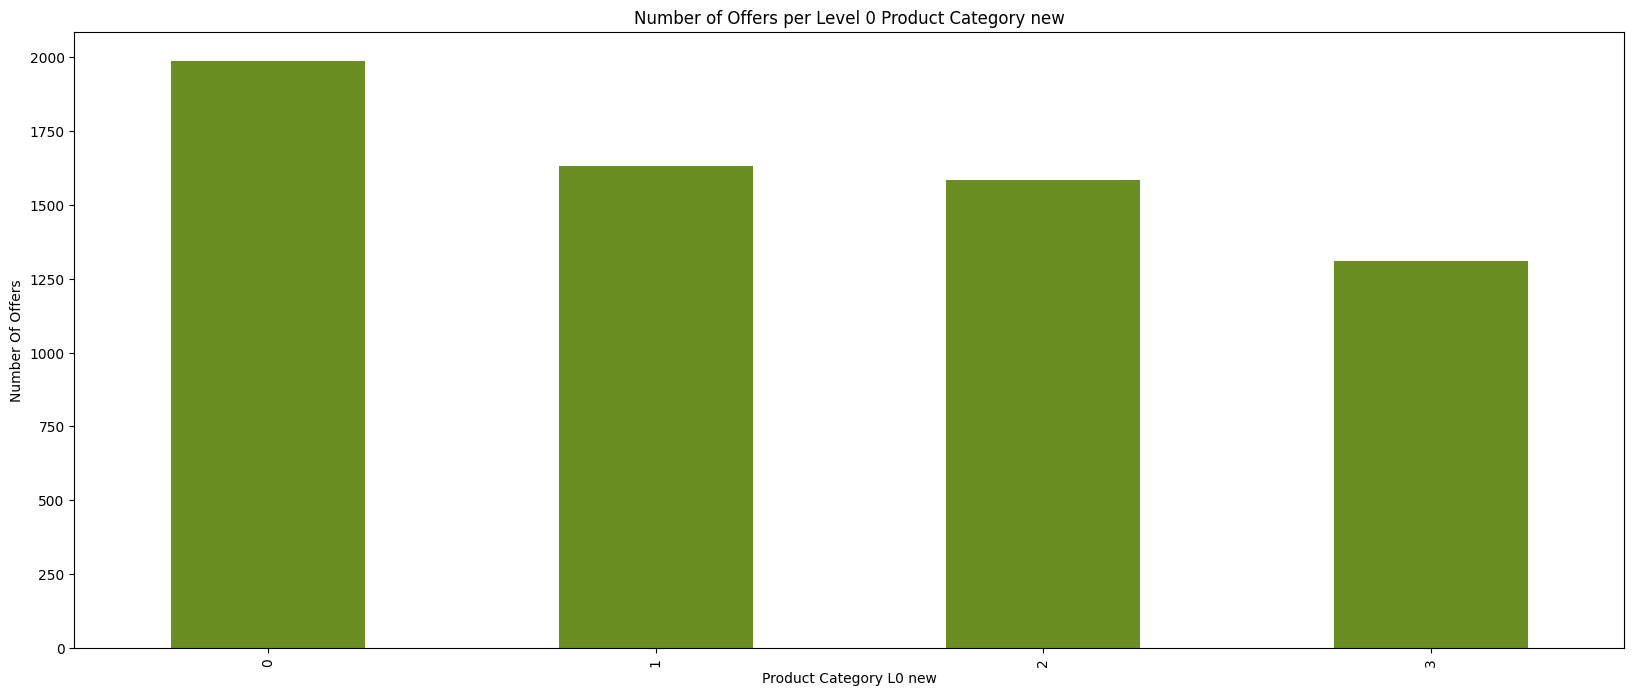

In [16]:
# visualise new categories 
df_offersPerCategoryL0new = df[['offer.startTime','L0Categories.new']].groupby('L0Categories.new').count()
df_offersPerCategoryL0new = df_offersPerCategoryL0new.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCategoryL0new = df_offersPerCategoryL0new.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCategoryL0new.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Product Category L0 new', title='Number of Offers per Level 0 Product Category new',color='olivedrab')
plt.show()


In [17]:
df_offersPerCategoryL0new_timeseries = pd.pivot_table(df, values='offer.ean', index='offer.startTime',columns='L0Categories.new',aggfunc='count')
df_offersPerCategoryL0new_timeseries.head()
#plt.plot(df_offersPerCategoryL0new_timeseries[0])
#plt.show()

L0Categories.new,0,1,2,3
offer.startTime,,,,
2023-02-16 08:05:52+01:00,1.0,NaN,NaN,NaN
2023-02-20 11:30:59+01:00,NaN,1.0,NaN,NaN
2023-02-21 06:17:08+01:00,NaN,NaN,NaN,1.0
2023-02-21 13:06:14+01:00,NaN,1.0,NaN,NaN
2023-02-21 13:07:12+01:00,NaN,1.0,NaN,NaN


In [18]:
# folium visualisations
import folium
from folium.plugins import HeatMap

# initialise map
map_1 = folium.Map([55.680168, 12.58234], zoom_start=7,tiles = "Stamen Toner")
# filter for category
#df_heat = df[df['L0Categories.new']==1]
# transform data
df_heat = df[['lon','lat']].dropna()
heat_data = [[row['lon'],row['lat']] for index, row in df_heat.iterrows()]
# add coordinates to initialised map
HeatMap(heat_data).add_to(map_1)
# show map
map_1

In [19]:
# folium visualisations for each product type
# initialise map
productcategory = 4

map_label = folium.Map([55.680168, 12.58234], zoom_start=7,tiles = "Stamen Toner")
# filter for category
df_heat = df[df['L0Categories.new']==productcategory]
# transform data
df_heat = df[['lon','lat']].dropna()
heat_data = [[row['lon'],row['lat']] for index, row in df_heat.iterrows()]
# add coordinates to initialised map
HeatMap(heat_data).add_to(map_label)
# show map
map_label

# no differnce in regional distribution for different product label types 

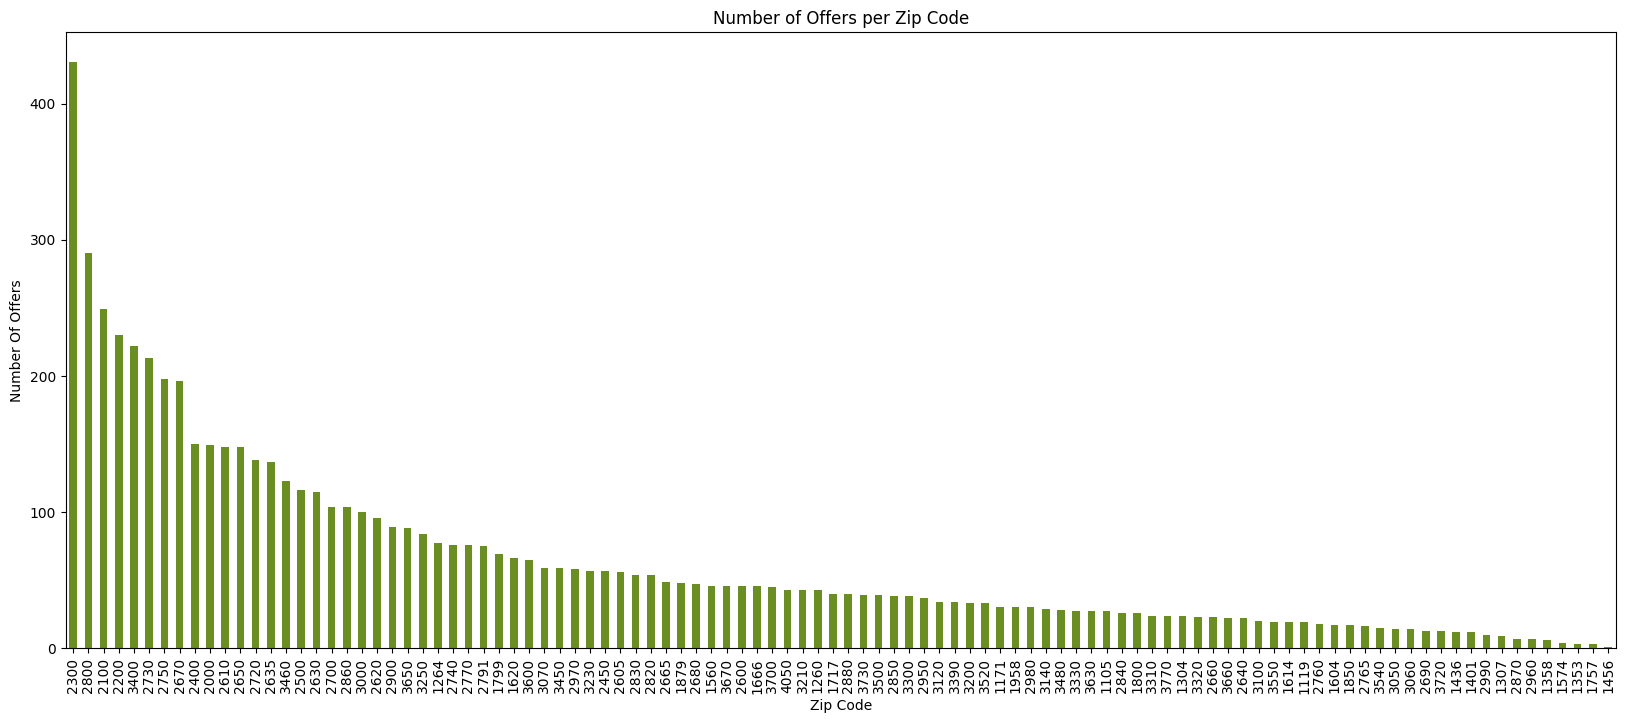

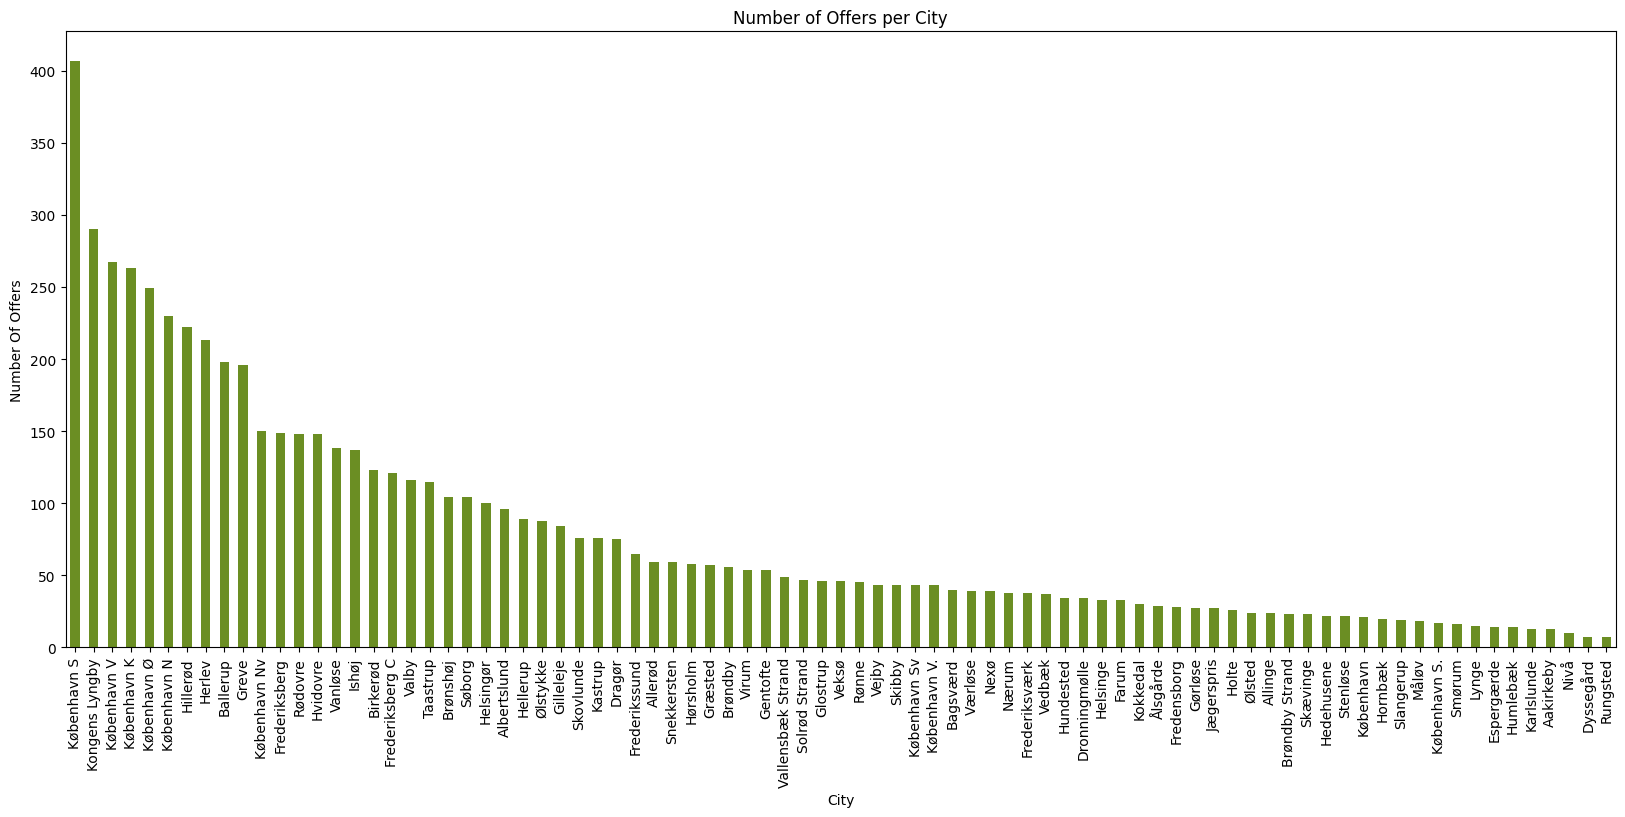

In [20]:
# which postal code has the highest amount of offers

# visualise new categories 
df_offersPerZip = df[['offer.startTime','address.zip']].groupby('address.zip').count()
df_offersPerZip = df_offersPerZip.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerZip = df_offersPerZip.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerZip.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='Zip Code', title='Number of Offers per Zip Code',color='olivedrab')
plt.show()

# visualise new categories 
df_offersPerCity = df[['offer.startTime','address.city']].groupby('address.city').count()
df_offersPerCity = df_offersPerCity.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_offersPerCity = df_offersPerCity.sort_values('NumberOfOffers', ascending=False)
# create plot
df_offersPerCity.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers', xlabel='City', title='Number of Offers per City',color='olivedrab')
plt.show()

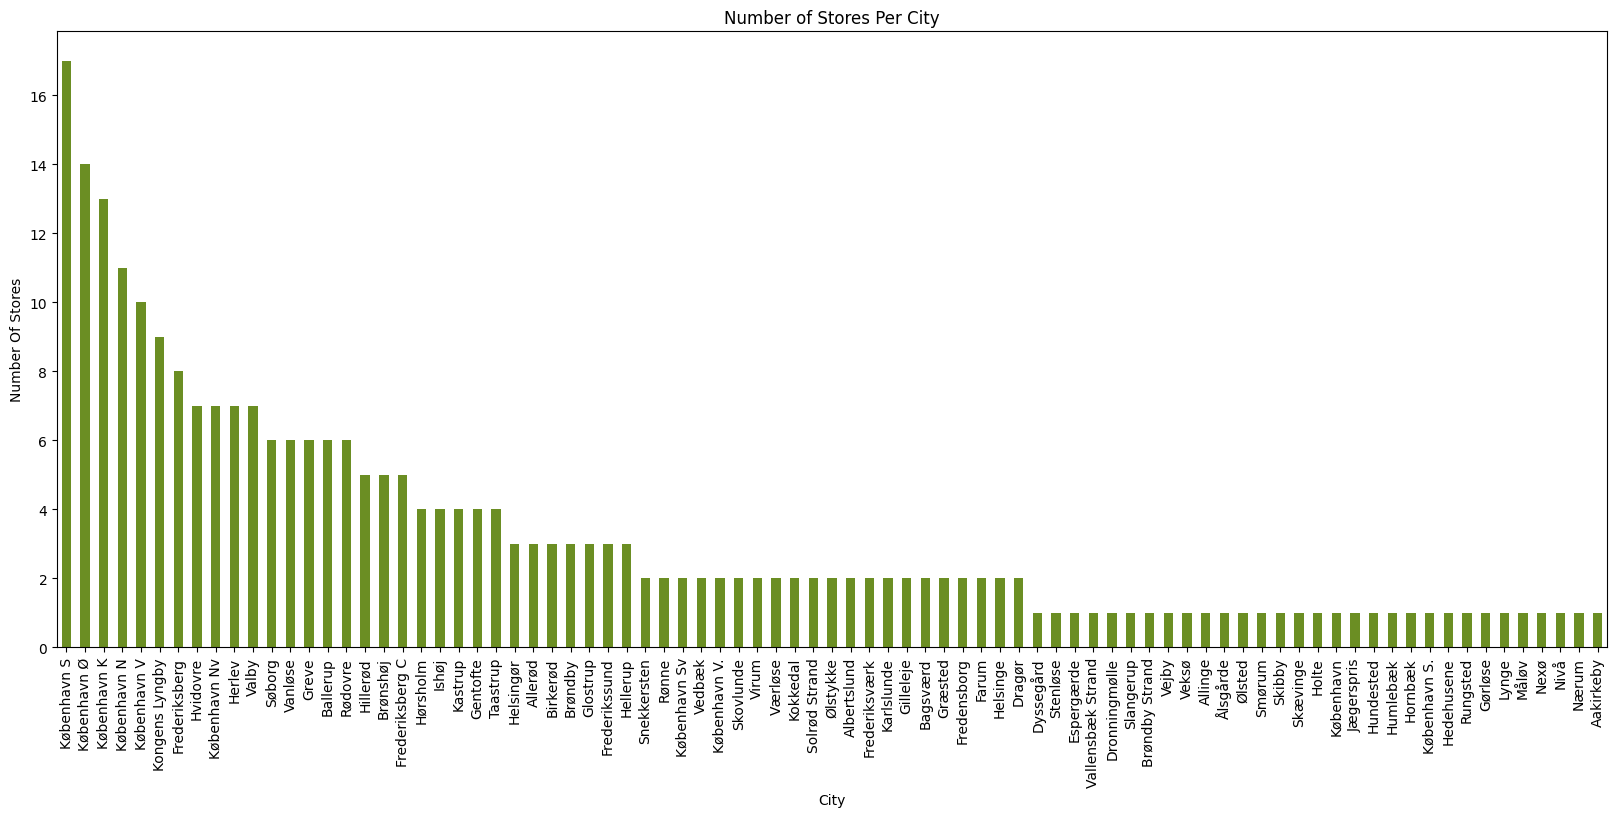

In [21]:
# how many shops per city/postal codes
df_NumberOfStores = df[['address.street','address.city']].groupby('address.city').nunique()
df_NumberOfStores = df_NumberOfStores.rename(columns = {'address.street': 'NumberOfStores'})
df_NumberOfStores = df_NumberOfStores.sort_values('NumberOfStores', ascending=False)
# create plot
df_NumberOfStores.plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Stores', xlabel='City', title='Number of Stores Per City',color='olivedrab')
plt.show()

In [30]:
# which store has the most offers
# show top 5
df_NumberOfOffersperStore = df[['address.street','address.city','offer.startTime']].groupby(['address.street','address.city']).count()
df_NumberOfOffersperStore = df_NumberOfOffersperStore.rename(columns = {'offer.startTime': 'NumberOfOffers'})
df_NumberOfOffersperStore = df_NumberOfOffersperStore.sort_values('NumberOfOffers', ascending=False)
df_NumberOfOffersperStore.head()

,,NumberOfOffers
address.street,address.city,
Slotsarkaderne 26,Hillerød,108
Borupvang 2,Ballerup,96
Herlev Bygade 9,Herlev,90
Stiholmsvej 6,Birkerød,86
Arne Jacobsens Alle 24,København S,81


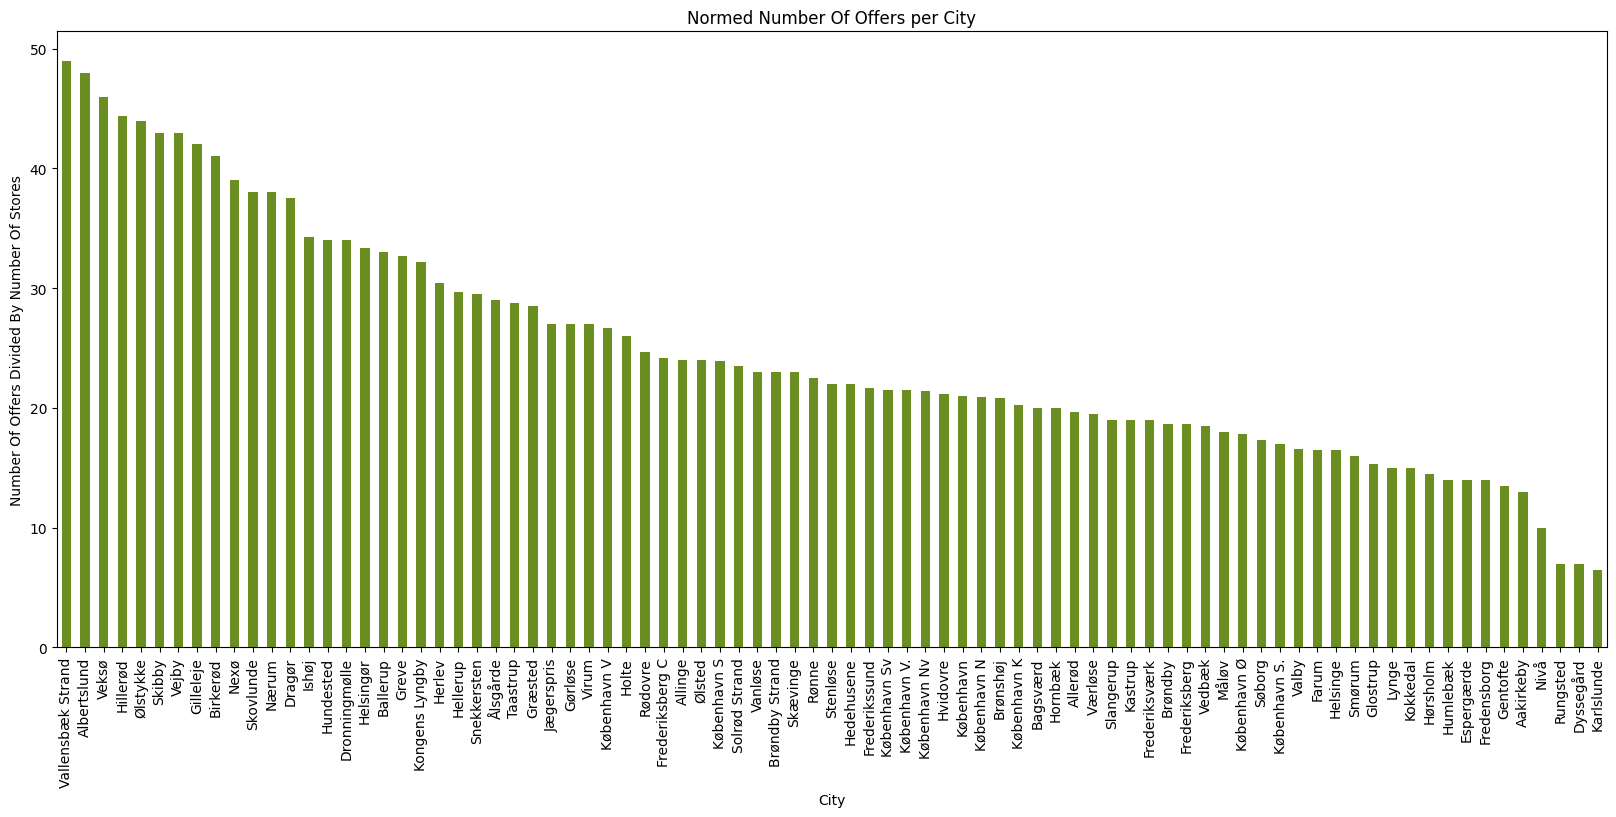

In [40]:
# normalised offers per city based on how many stores are in a city

df_NumberOfOffers_norm = df[['address.street','address.city']].groupby('address.city').nunique().join(df[['offer.startTime','address.city']].groupby('address.city').count())
df_NumberOfOffers_norm = df_NumberOfOffers_norm.rename(columns = {'offer.startTime': 'NumberOfOffers', 'address.street': 'NumberOfStores'})
df_NumberOfOffers_norm['NumberOfOffersNormed'] = df_NumberOfOffers_norm['NumberOfOffers']/df_NumberOfOffers_norm['NumberOfStores']
df_NumberOfOffers_norm = df_NumberOfOffers_norm.sort_values('NumberOfOffersNormed',ascending=False)

df_NumberOfOffers_norm[['NumberOfOffersNormed']].plot.bar(figsize=(20,8), legend=False,ylabel='Number Of Offers Divided By Number Of Stores', xlabel='City', title='Normed Number Of Offers per City',color='olivedrab')
plt.show()

In [33]:
df[['offer.startTime','address.city']].groupby('address.city').count()

,offer.startTime
address.city,
Aakirkeby,13
Albertslund,96
Allerød,59
Allinge,24
Bagsværd,40
...,...
Virum,54
Værløse,39
Ålsgårde,29
